# Sentiment Analysis Project

### Installing TensorFlow

In [1]:
pip install tensorflow


### Load the IMDb Dataset

In [2]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 0s 0us/step


## Step1: Data Exploration

In [4]:
import tensorflow as tf
import numpy as np

# Load the dataset
(train_data, train_labels), _ = tf.keras.datasets.imdb.load_data(num_words=10000)

# Get and reverse the word index
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Print a few decoded reviews
for i in range(3):
    print("Review:", decode_review(train_data[i]))
    print("Label:", "Positive" if train_labels[i] else "Negative")
    print("\n")

# Check sentiment distribution
positive_reviews = np.sum(train_labels)
negative_reviews = len(train_labels) - positive_reviews
print("Positive reviews:", positive_reviews)
print("Negative reviews:", negative_reviews)


1641221/1641221 [==============================] - 0s 0us/step
Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children 

## Step 2: Data Preprocessing

Data Preprocessing Tasks:

  1.Sequence Padding: Standardize the lengths of the reviews.

  2.Data Splitting: Optionally, create a validation set from the training data for model tuning.


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum length for each review
max_length = 100
padding_type = 'post' 
trunc_type = 'post'

train_data_padded = pad_sequences(train_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_data_padded = pad_sequences(test_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Print the shape of the padded data to confirm the preprocessing
print("Shape of training data (padded):", train_data_padded.shape)
print("Shape of test data (padded):", test_data_padded.shape)

validation_data = train_data_padded[:10000]
validation_labels = train_labels[:10000]

# Remaining data will be used for training
partial_train_data = train_data_padded[10000:]
partial_train_labels = train_labels[10000:]

print("Shape of partial training data:", partial_train_data.shape)
print("Shape of validation data:", validation_data.shape)


Shape of training data (padded): (25000, 100)
Shape of test data (padded): (25000, 100)
Shape of partial training data: (15000, 100)
Shape of validation data: (10000, 100)


## Step 3: Model Selection

Depending on the topic chosen (Sentiment Analysis), we have decided to choose two types of deep learning models to implement and compare.

  1.Recurrent Neural Network (RNN) - Specifically, an LSTM (Long Short-Term Memory) model, which is effective for sequence data like text.

  2.Transformer-based Model - A simplified version of a transformer model suitable for binary classification tasks.

## Step 4: LSTM Model Implementation

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Model parameters
vocab_size = 10000  # As defined when loading the dataset
embedding_dim = 16
lstm_units = 32  # Number of units in LSTM layer

# Building the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 166305 (649.63 KB)
Trainable params: 166305 (649.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 5: Model Training

In [7]:
# Training parameters
epochs = 10
batch_size = 128

# Training the model
history = model.fit(
    partial_train_data,
    partial_train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(validation_data, validation_labels),
    verbose=2
)


Epoch 1/10
118/118 - 13s - loss: 0.6144 - accuracy: 0.6364 - val_loss: 0.4712 - val_accuracy: 0.7786 - 13s/epoch - 111ms/step
Epoch 2/10
118/118 - 9s - loss: 0.3717 - accuracy: 0.8497 - val_loss: 0.4496 - val_accuracy: 0.8122 - 9s/epoch - 76ms/step
Epoch 3/10
118/118 - 7s - loss: 0.2662 - accuracy: 0.8973 - val_loss: 0.4106 - val_accuracy: 0.8110 - 7s/epoch - 62ms/step
Epoch 4/10
118/118 - 9s - loss: 0.2060 - accuracy: 0.9278 - val_loss: 0.4760 - val_accuracy: 0.8156 - 9s/epoch - 76ms/step
Epoch 5/10
118/118 - 9s - loss: 0.1696 - accuracy: 0.9434 - val_loss: 0.4700 - val_accuracy: 0.8055 - 9s/epoch - 76ms/step
Epoch 6/10
118/118 - 8s - loss: 0.1313 - accuracy: 0.9597 - val_loss: 0.5369 - val_accuracy: 0.8014 - 8s/epoch - 71ms/step
Epoch 7/10
118/118 - 10s - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.6134 - val_accuracy: 0.7961 - 10s/epoch - 86ms/step
Epoch 8/10
118/118 - 9s - loss: 0.0950 - accuracy: 0.9737 - val_loss: 0.7308 - val_accuracy: 0.7934 - 9s/epoch - 75ms/step
Epoch 9/10


## Step 6: Model Evaluation and Analysis

Analyzing the Model Performance

  1.Plotting Training and Validation Metrics: To better understand the model's performance, it's helpful to plot the training and validation accuracy and loss.

  2.Evaluating on Test Data: Finally, we have evaluated the model on the test data to see how it performs on unseen data.

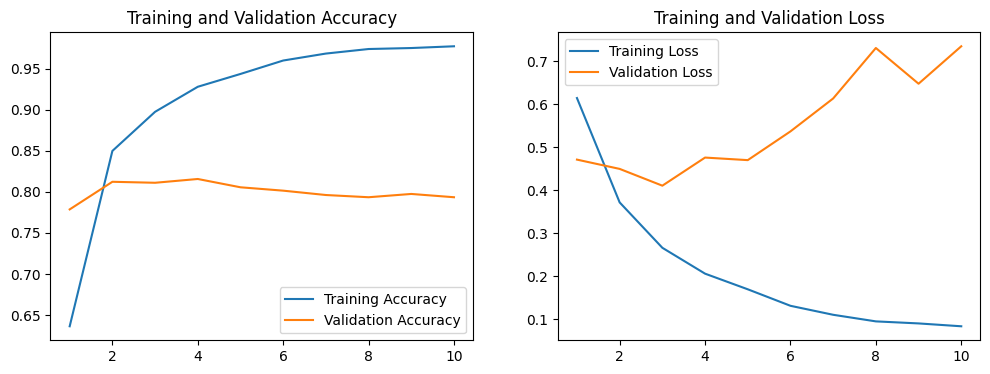

In [8]:
import matplotlib.pyplot as plt

# extracting accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Plot Analysis

Training Accuracy: This increases steadily over the epochs, which is a good sign that the model is learning effectively from the training data.

Validation Accuracy: It improves initially but then plateaus, indicating that the model isn't generalizing as well beyond the training data.

Training Loss: It decreases over time, as expected when a model is learning.

Validation Loss: It starts to increase after a few epochs, which is a classic sign of overfitting. The model is performing well on the training data but is failing to generalize that performance to the validation data.

In [9]:
test_loss, test_accuracy = model.evaluate(test_data_padded, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


782/782 - 7s - loss: 0.8174 - accuracy: 0.7699 - 7s/epoch - 9ms/step
Test Accuracy: 76.99%
